In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from pygam import LinearGAM, s
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load dataset
house_df = pd.read_csv("kc_house_data.csv")  # Ensure the file is in the correct path

# Select relevant features (based on available columns in your dataset)
features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition", 
            "grade", "sqft_above", "sqft_basement", "yr_built"]
target = "price"  # Updated target column

predictors = ['SqFtTotLiving']
outcome = 'sqft_living'



simple_lm = LinearRegression()
simple_lm.fit(house_df[predictors], house_df[outcome])
# Example: Intercept ~ base, Coef ~ $ per sq ft

# Drop missing values
house_df = house_df.dropna(subset=features + [target])

X = house_df[features]
y = house_df[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Simple Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print(f"Linear Regression RMSE: {rmse_lin:.2f}")

# 2. Polynomial Regression (Degree 2)
poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
print(f"Polynomial Regression (Degree 2) RMSE: {rmse_poly:.2f}")

# 3. Spline Regression using Generalized Additive Models (GAM)
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9))
gam.fit(X_train, y_train)
y_pred_gam = gam.predict(X_test)
rmse_gam = np.sqrt(mean_squared_error(y_test, y_pred_gam))
print(f"Spline Regression (GAM) RMSE: {rmse_gam:.2f}")

# Cross-validation for model evaluation
cv_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_cv = np.sqrt(-cv_scores.mean())
print(f"Cross-Validation RMSE: {rmse_cv:.2f}")

# Plot Residuals for Diagnostics
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin - y_test, alpha=0.5, label="Linear Regression", color='b')
plt.scatter(y_test, y_pred_poly - y_test, alpha=0.5, label="Polynomial Regression", color='r')
plt.scatter(y_test, y_pred_gam - y_test, alpha=0.5, label="Spline Regression", color='g')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Residuals")
plt.legend()
plt.title("Residual Plot")
plt.show()


KeyError: "None of [Index(['SqFtTotLiving'], dtype='object')] are in the [columns]"

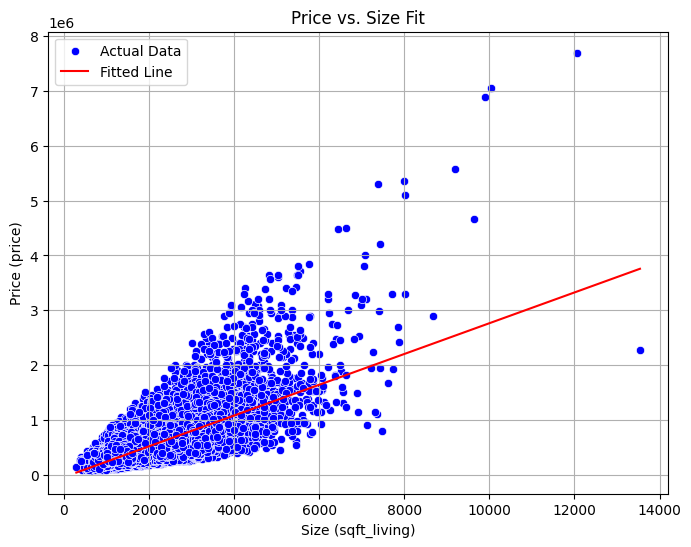

In [2]:
house_df = pd.read_csv("kc_house_data.csv")  # Ensure the file is in the correct path

# Select relevant features (based on available columns in your dataset)
features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition", 
            "grade", "sqft_above", "sqft_basement", "yr_built"]
target = "price"  # Updated target column


# Define predictors and outcome
predictors = ['sqft_living']
outcome = 'price'

# Fit the Linear Regression model
simple_lm = LinearRegression()
simple_lm.fit(house_df[predictors], house_df[outcome])

# Predictions
house_df['PredictedPrice'] = simple_lm.predict(house_df[predictors])

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=house_df['sqft_living'], y=house_df['price'], label="Actual Data", color='blue')
sns.lineplot(x=house_df['sqft_living'], y=house_df['PredictedPrice'], color='red', label="Fitted Line")

plt.xlabel("Size (sqft_living)")
plt.ylabel("Price (price)")
plt.title("Price vs. Size Fit")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [17]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define predictors and outcome
predictors = ['sqft_living', 'sqft_lot', 'bathrooms', 'grade']
outcome = 'price'

# Fit Multiple Linear Regression Model
house_lm = LinearRegression()
house_lm.fit(house_df[predictors], house_df[outcome])

# Get Intercept and Coefficients
intercept = house_lm.intercept_
coefficients = dict(zip(predictors, house_lm.coef_))

# Display Results
print(intercept)
print( coefficients)

# Predictions
fitted = house_lm.predict(house_df[predictors])

# Compute RMSE
RMSE = np.sqrt(mean_squared_error(house_df[outcome], fitted))

# Compute R-squared
r2 = r2_score(house_df[outcome], fitted)

# Detailed regression analysis using statsmodels for p-values
X = house_df[predictors]
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(house_df[outcome], X)
results = model.fit()

# Extracting p-values
p_values = results.pvalues

# Display Results
RMSE, r2, p_values

-595685.8122350046
{'sqft_living': 206.46486335117126, 'sqft_lot': -0.26643144400603447, 'bathrooms': -39443.45847018137, 'grade': 103669.74017772256}


(249532.22596703537,
 0.5380018245970456,
 const          0.000000e+00
 sqft_living    0.000000e+00
 sqft_lot       1.711092e-10
 bathrooms      2.689854e-30
 grade          0.000000e+00
 dtype: float64)

In [14]:
# Fit Multiple Linear Regression Model
house_lm = LinearRegression()
house_lm.fit(house_df[predictors], house_df[outcome])

# Get Intercept and Coefficients
intercept = house_lm.intercept_
coefficients = dict(zip(predictors, house_lm.coef_))

# Display Results
intercept, coefficients


(-595685.8122350046,
 {'sqft_living': 206.46486335117126,
  'sqft_lot': -0.26643144400603447,
  'bathrooms': -39443.45847018137,
  'grade': 103669.74017772256})

In [9]:
!pip install statsmodels


  Using cached statsmodels-0.14.4-cp39-cp39-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 2.1 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/9.9 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.9 MB 1.1 MB/s eta 0:00:09
   ---- ----------------------------------- 1.0/9.9 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.9 MB 1.2 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.9 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.9 MB 1.3 MB/s eta 0:00:07
   ------- -------------------------------- 1.8/9.9 MB 1.3 MB/s eta 0:00:07
   -------- ------------------------------- 2.1/9.9 MB 1.0 MB/s eta 0:00:08
   --------- -----------------------